## Model Traing

#### 1.1 Import Data and Required Packages

Import required libraries


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, mean_absolute_error, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
X = df.drop(columns=['math score'], axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [22]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [23]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns
print(num_features)
print(cat_features)

Index(['reading score', 'writing score'], dtype='object')
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [14]:
numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]


)

In [17]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading score', 'writing score'], dtype='object'))])

In [24]:
X = preprocessor.fit_transform(X)


In [27]:
X.shape

(1000, 19)

#### Train/Test split

* 80/20

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Define a function to give all metrics after model training

In [59]:
def evaluete_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [60]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGB Regressor': XGBRegressor(),
    'Cat Boost Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor()

} 

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluete_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2= evaluete_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))
    

    print('----------------------------------------')

    print('Model Performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("=" *35)
    print('\n')


Linear Regression
Model Performance for Training set
- Root Mean Squared Error: 5.3624
- Mean Absolute Error: 4.2674
- R2 score: 0.8792
----------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3401
- Mean Absolute Error: 4.2978
- R2 score: 0.8549


Lasso
Model Performance for Training set
- Root Mean Squared Error: 6.5481
- Mean Absolute Error: 5.1617
- R2 score: 0.8198
----------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.9097
- Mean Absolute Error: 4.7133
- R2 score: 0.8223


Ridge
Model Performance for Training set
- Root Mean Squared Error: 5.3317
- Mean Absolute Error: 4.2429
- R2 score: 0.8805
----------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3527
- Mean Absolute Error: 4.2862
- R2 score: 0.8542


K-Neighbors Regressor
Model Performance for Training set
- Root Mean Squared Error: 5.9693
- Mean Absolute Error: 4.7073
- R2 score: 0.8503
-----

## Insight from the model:

* Linear regression performed better than all of them
* The other models either has low R-square or has issue of overfitting.
* I will perform Accuracy and see if Linear regression would still out perform the rest.


#### Linear Regression

In [61]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("accuracy of the Linear model is %.2f" %score)


accuracy of the Linear model is 85.49


### Results

In [64]:
print(model_list)
print(r2_list)


['Linear Regression', 'Lasso', 'Ridge', 'K-Neighbors Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor', 'Cat Boost Regressor', 'AdaBoost Regressor']
[0.8548709353549322, 0.8222568727843229, 0.8541842525546833, 0.7930276349941473, 0.7010025955519366, 0.8245237737374251, 0.7998018978107162, 0.8435042034479189, 0.8181591790325558]


In [66]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.854871
2,Ridge,0.854184
7,Cat Boost Regressor,0.843504
5,Random Forest Regressor,0.824524
1,Lasso,0.822257
8,AdaBoost Regressor,0.818159
6,XGB Regressor,0.799802
3,K-Neighbors Regressor,0.793028
4,Decision Tree Regressor,0.701003


##### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

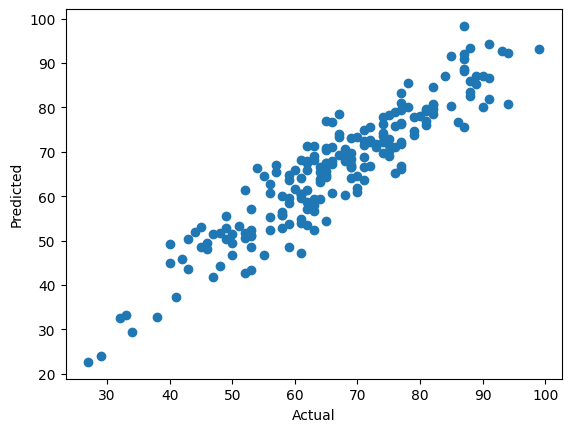

In [68]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0, 0.5, 'Predicted Math Score')

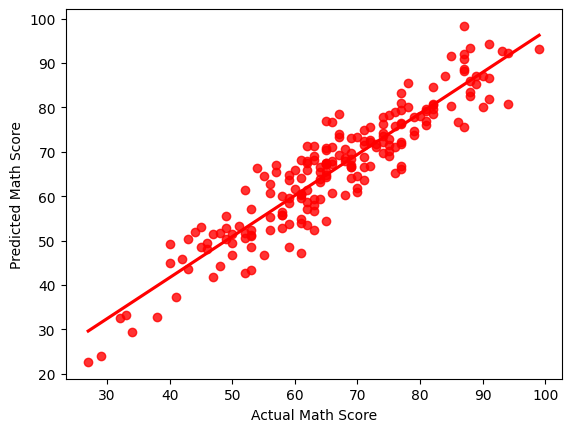

In [70]:
sns.regplot(x=y_test, y=y_pred, ci=None, color = 'red')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')

### Difference BETWEEN